In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/athlete_events.csv')
region_df = pd.read_csv('/content/noc_regions.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df = df[df['Season'] == 'Summer']

In [ ]:
df.shape

(222552, 15)

In [ ]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
89564,45388,"Thomas ""Tommy"" Hampson",M,24.0,184.0,69.0,Great Britain,GBR,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Silver
55380,28407,Wilhelm (William) Hunt Diederich,M,48.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
202599,101759,Fred A. Rodriguez,M,27.0,177.0,70.0,United States,USA,2000 Summer,2000,Summer,Sydney,Cycling,"Cycling Men's Road Race, Individual",NaN
10527,5756,Ivan Stankov Atanasov,M,22.0,173.0,68.0,Bulgaria,BUL,1980 Summer,1980,Summer,Moskva,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
226133,113655,Roland Otto Eugen Spngberg,M,25.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN


In [ ]:
region_df.sample(5)

,NOC,region,notes
207,TUR,Turkey,NaN
223,WIF,Trinidad,West Indies Federation
217,UZB,Uzbekistan,NaN
142,NAM,Namibia,NaN
53,CYP,Cyprus,NaN


In [ ]:
df = df.merge(region_df,on='NOC',how='left')  # Merge two DataFrames

In [ ]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9189
Height,51857
Weight,53854
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df.duplicated().sum()

np.int64(1385)

In [ ]:
df.drop_duplicates(inplace=True)  # Drop specified columns or rows

In [ ]:
df['Medal'].value_counts()  # Count frequency of values

,count
Medal,
Gold,11456
Bronze,11409
Silver,11212


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)  # Assign a value to a variable

In [ ]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()  # Group the data

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


showing wrong values because of repetition

In [ ]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])  # Drop specified columns

In [ ]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [ ]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']  # Assign a value to a variable

In [ ]:
years = df['Year'].unique().tolist()  # Assign a value to a variable

In [ ]:
years.sort()

In [ ]:
years.insert(0,'Overall')

In [ ]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [ ]:
country = np.unique(df['region'].dropna().values).tolist()  # Drop specified columns or rows

In [ ]:
country.sort()

In [ ]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [ ]:
country.insert(0,'Overall')

In [ ]:
# def fetch_medal_tally(df, year, country):
#     medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
#     flag = 0
#     if year == 'Overall' and country == 'Overall':
#         temp_df = medal_df
#     if year == 'Overall' and country != 'Overall':
#         flag = 1
#         temp_df = medal_df[medal_df['region'] == country]
#     if year != 'Overall' and country == 'Overall':
#         temp_df = medal_df[medal_df['Year'] == int(year)]
#     if year != 'Overall' and country != 'Overall':
#         temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

#     if flag == 1:
#         x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
#     else:
#         x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
#                                                                                       ascending=False).reset_index()

#     x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

In [ ]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [ ]:
medal_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [ ]:
df['Year'].unique().shape[0] -1

28

In [ ]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [ ]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [ ]:
df['Event'].unique().shape

(651,)

In [ ]:
df['Name'].unique().shape

(116122,)

In [ ]:
df['region'].unique().shape

(206,)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [ ]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('count')  # Reset index after groupby

In [ ]:
nations_over_time

,Year,count
28,1896,12
27,1904,14
26,1906,20
25,1908,22
24,1920,29
23,1912,29
22,1900,31
21,1924,45
20,1928,46
19,1932,47


In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(nations_over_time,  x='Year', y='count')  # Assign a value to a variable
fig.show()

In [ ]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('count')  # Remove duplicate rows

,Year,count
28,1896,43
27,1906,74
26,1900,90
25,1904,95
24,1912,107
23,1908,109
22,1928,122
20,1924,131
21,1932,131
19,1952,149


In [ ]:
x = df.drop_duplicates(['Year','Sport','Event'])  # Drop specified columns or rows

<Axes: xlabel='Year', ylabel='Sport'>

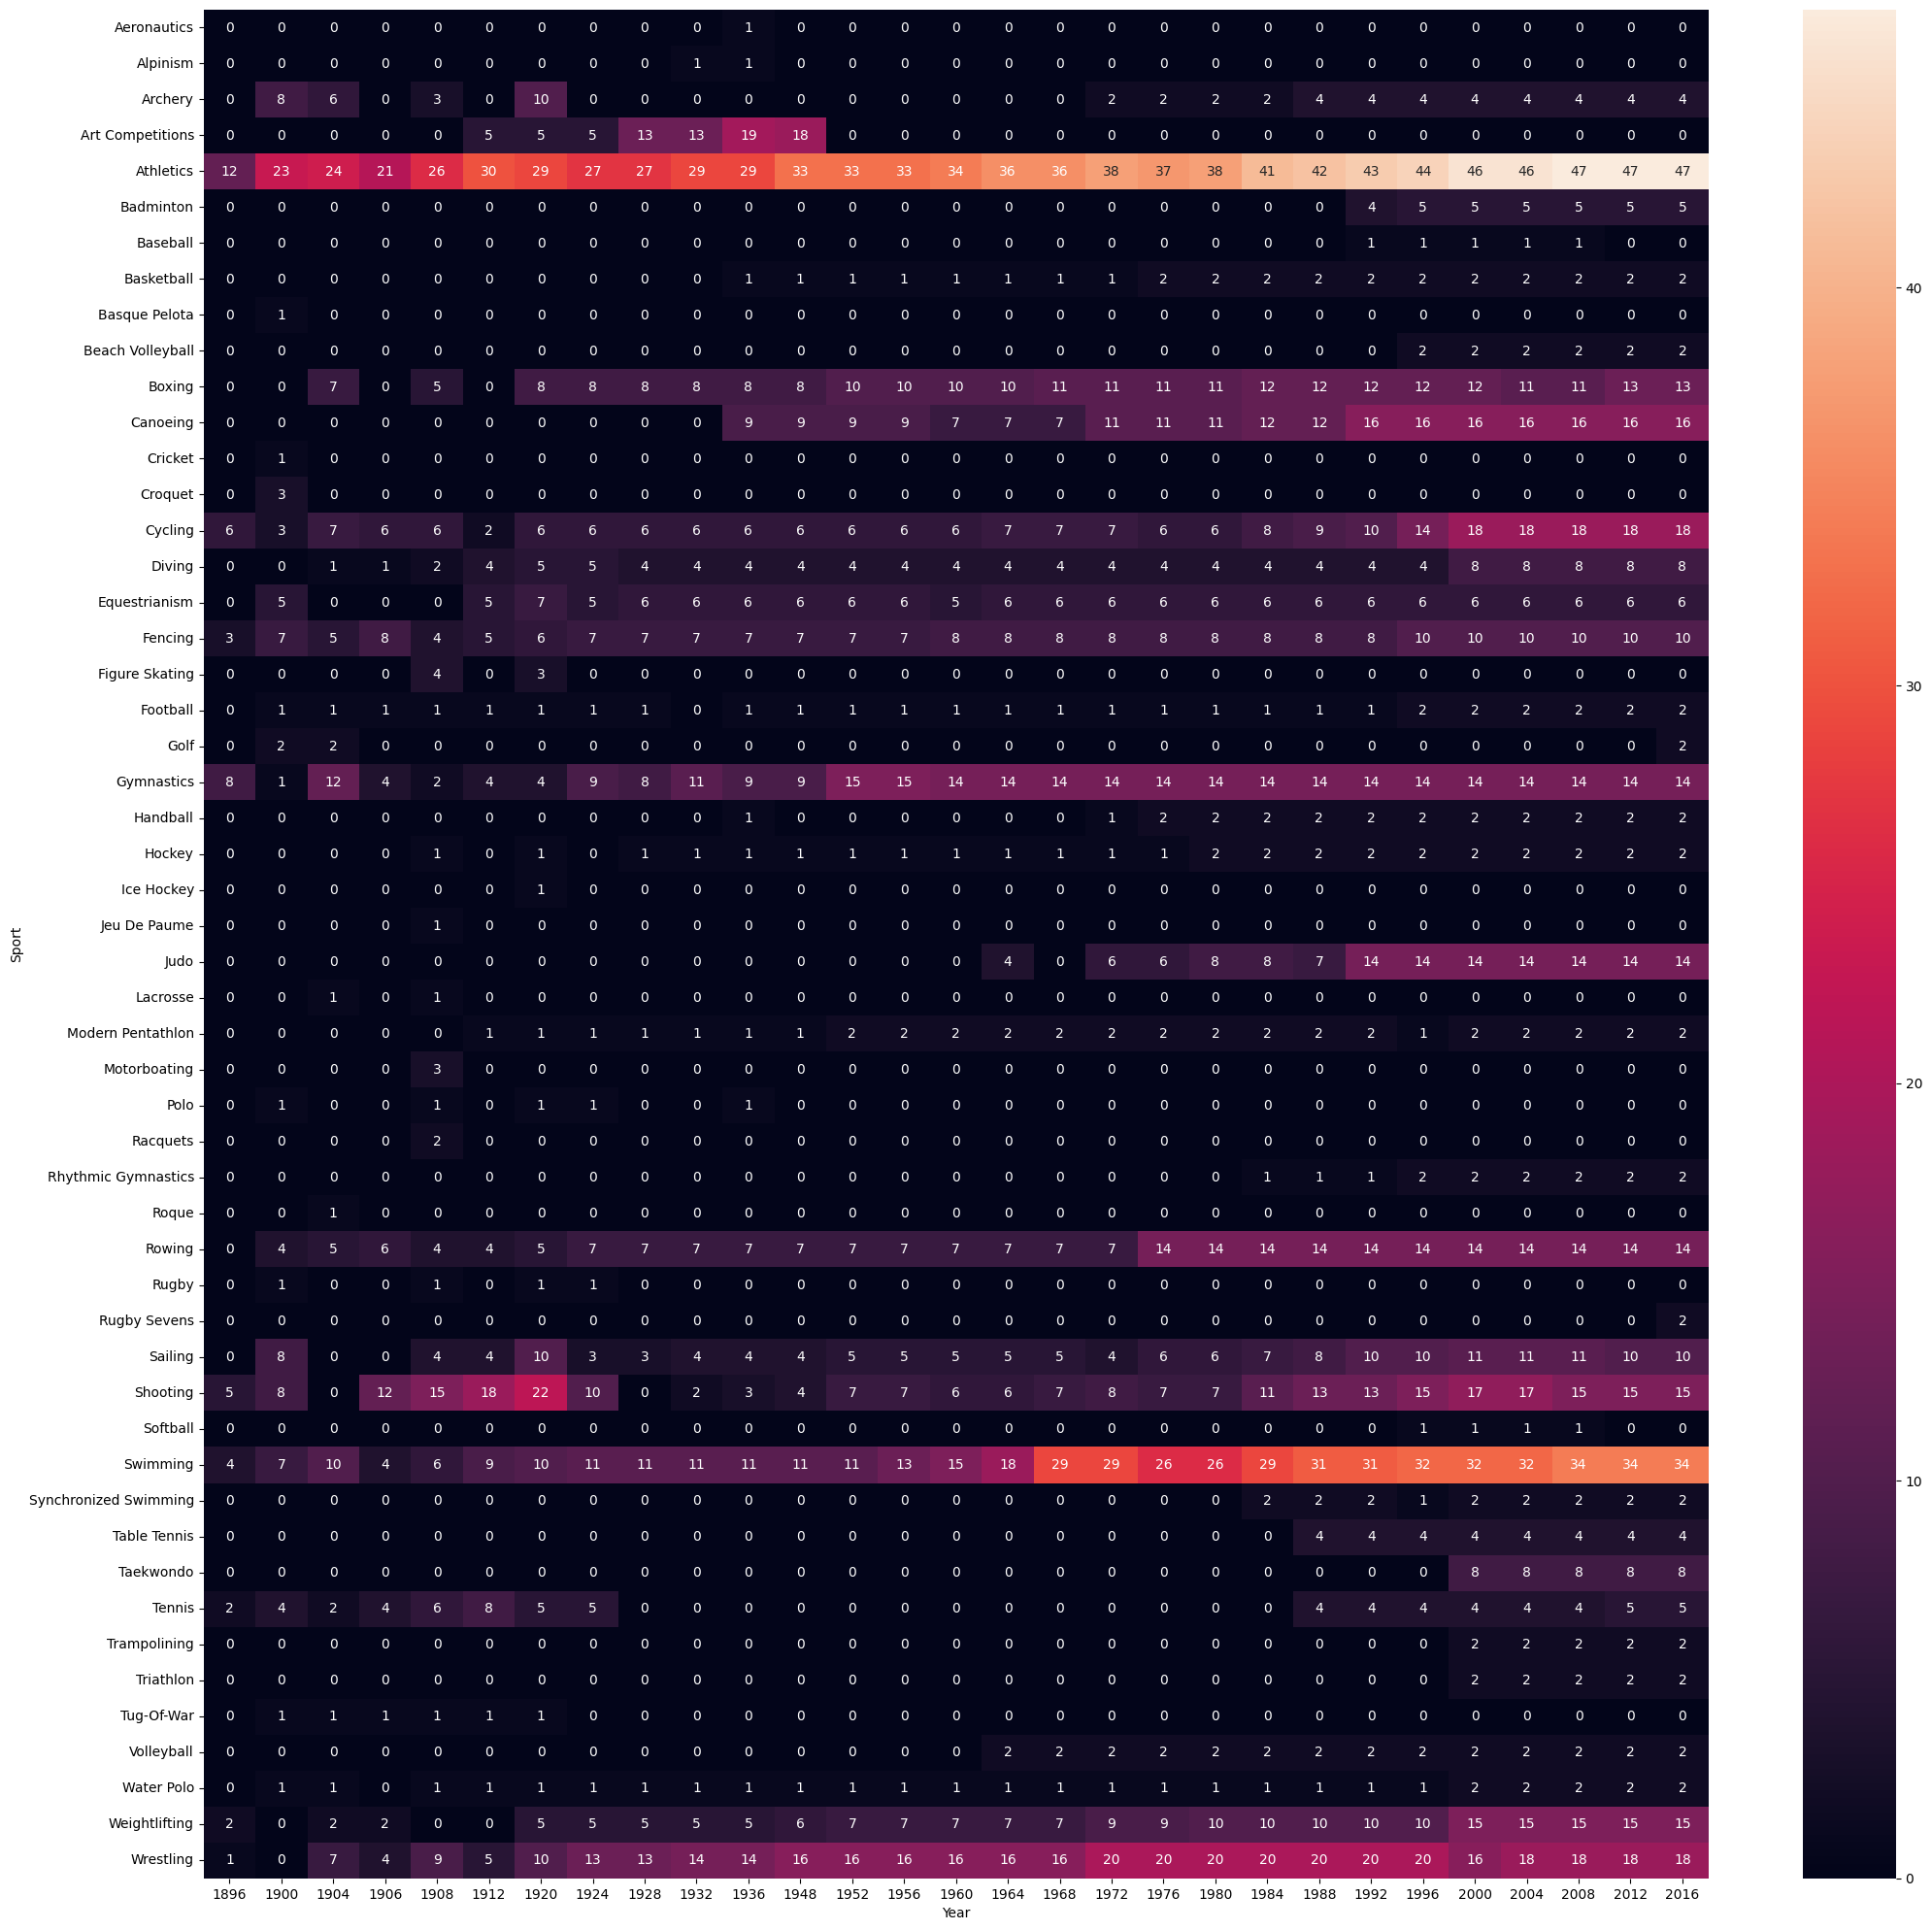

In [ ]:
plt.figure(figsize=(25,25))  # Assign a value to a variable
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)  # Fill missing values

In [ ]:
def most_successful(df, sport):  # Define a function
    temp_df = df.dropna(subset=['Medal'])  # Drop specified columns or rows

    if sport != 'Overall':  # Conditional check
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15)  # Reset index after groupby
    x.columns = ['Name', 'Medals']  # Rename columns correctly  # Assign a value to a variable

    x = x.merge(df, left_on='Name', right_on='Name', how='left')[  # Merge two DataFrames
        ['Name', 'Medals', 'Sport', 'region']].drop_duplicates('Name')  # Remove duplicate rows

    return x  # Return the result from the function

In [ ]:
most_successful(df,'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,Vitaly Venediktovich Shcherbo,10,Gymnastics,Russia
195,Polina Hryhorivna Astakhova,10,Gymnastics,Russia


country wise analysis

In [ ]:
temp_df = df.dropna(subset=['Medal'])  # Drop specified columns or rows
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)  # Drop specified columns or rows

/tmp/ipython-input-46-3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_df = temp_df[temp_df['region'] == 'USA']
new_df.groupby('Year').count()['Medal'].reset_index()  # Set index for the DataFrame

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


<Axes: xlabel='Year', ylabel='Sport'>

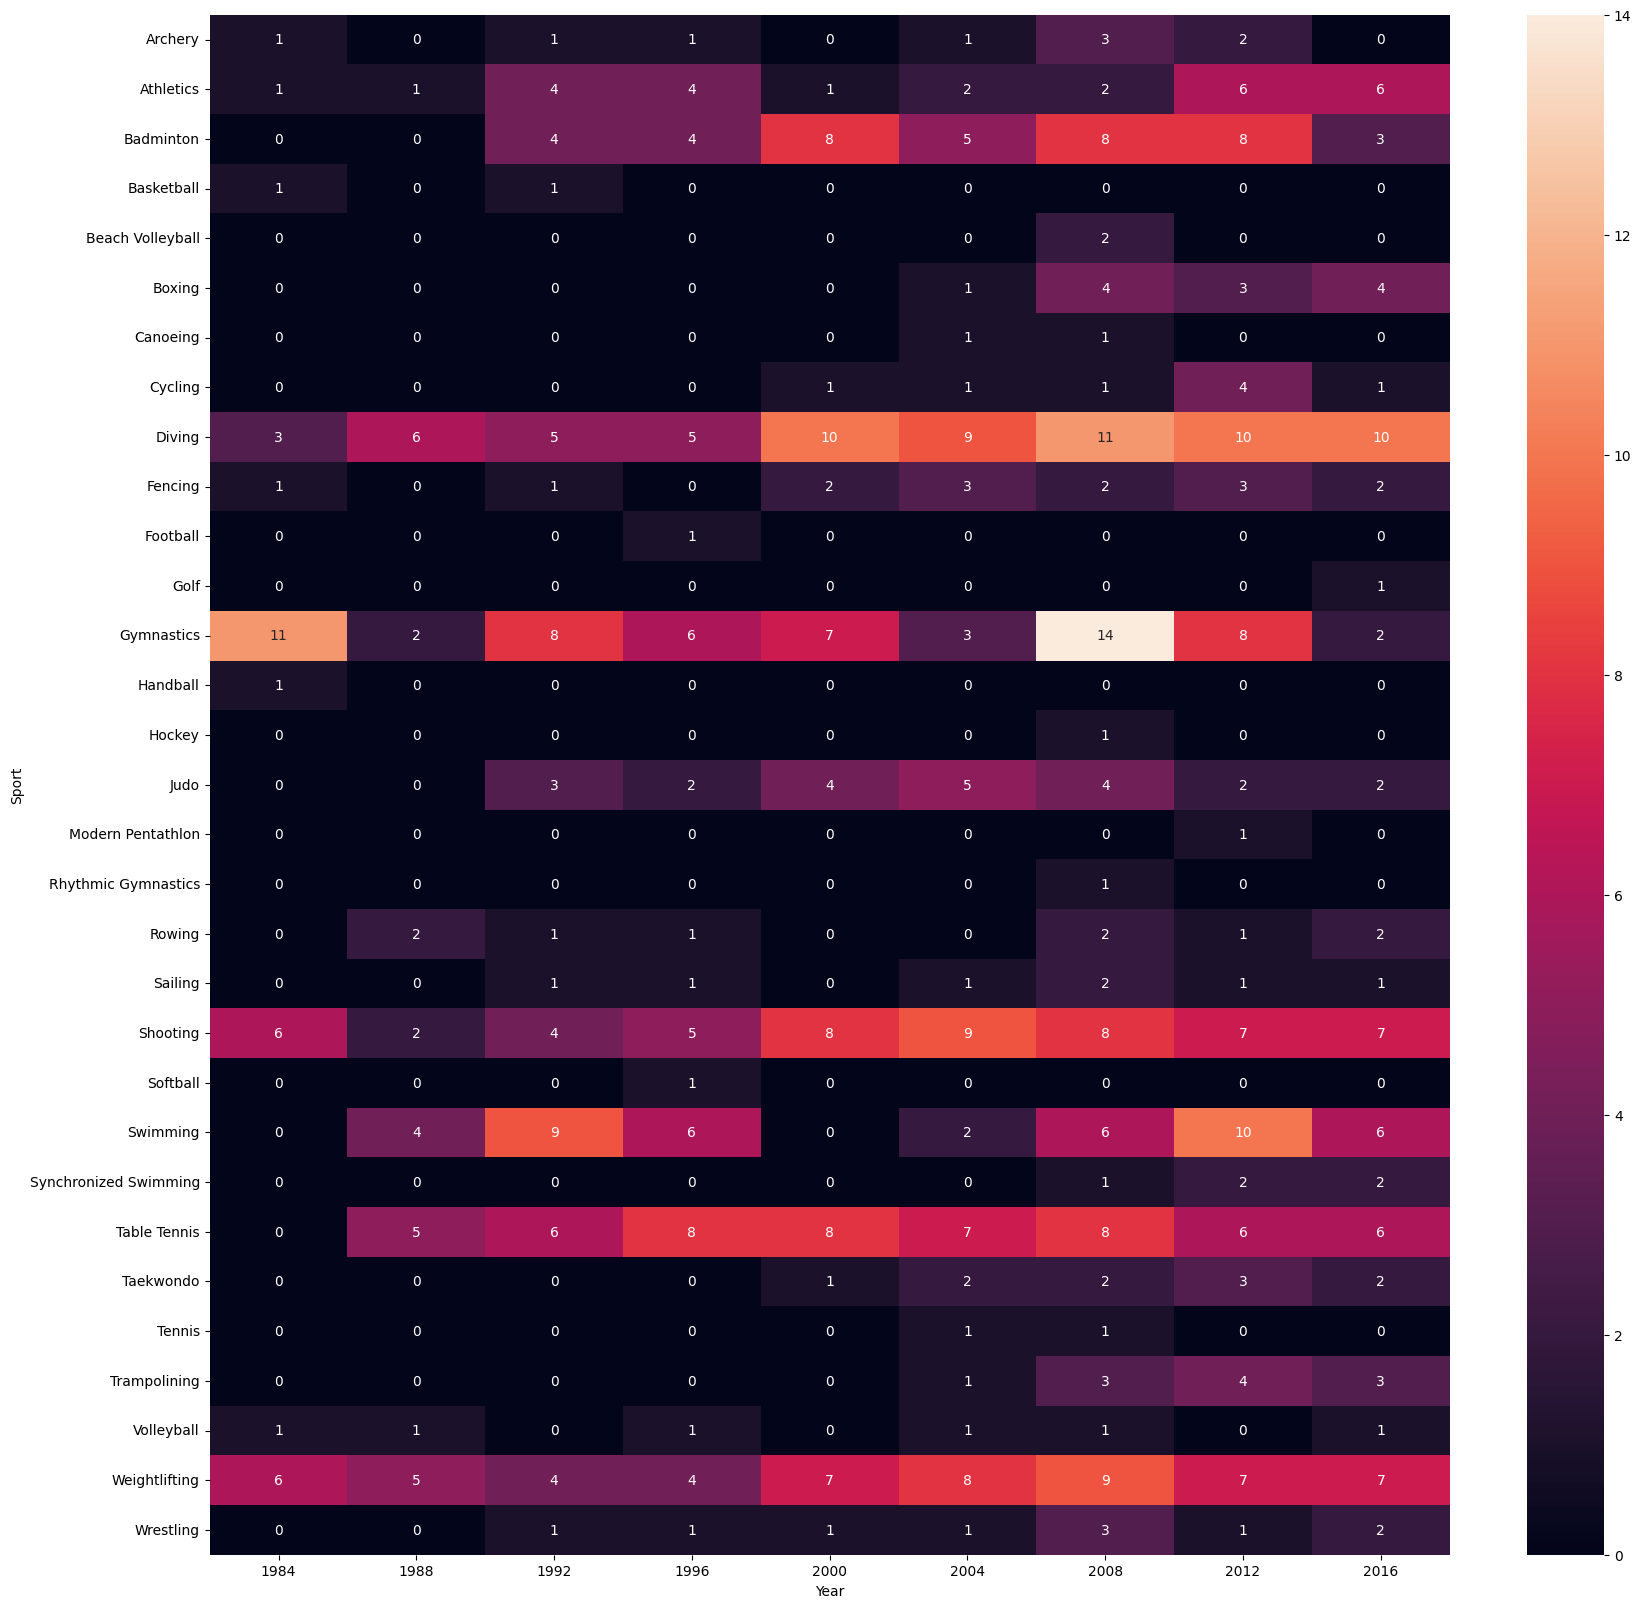

In [ ]:
new_df = temp_df[temp_df['region'] == 'China']
plt.figure(figsize=(20,20))  # Assign a value to a variable
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)  # Fill missing values

In [ ]:
def most_successful_countrywise(df, country):  # Define a function
    temp_df = df.dropna(subset=['Medal'])  # Drop specified columns or rows

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(15)  # Reset index after groupby
    x.columns = ['Name', 'Medals']  # Rename columns correctly  # Assign a value to a variable

    x = x.merge(df, left_on='Name', right_on='Name', how='left')[  # Merge two DataFrames
        ['Name', 'Medals', 'Sport']].drop_duplicates('Name')  # Remove duplicate rows

    return x  # Return the result from the function

In [ ]:
most_successful_countrywise(df,'USA')

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
43,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
60,Ryan Steven Lochte,12,Swimming
74,Natalie Anne Coughlin (-Hall),12,Swimming
86,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
98,Carl Townsend Osburn,11,Shooting
114,Mark Andrew Spitz,11,Swimming
126,"Gary Wayne Hall, Jr.",10,Swimming
136,"Raymond Clarence ""Ray"" Ewry",10,Athletics


In [ ]:
import plotly.figure_factory as ff

In [ ]:
athlete_df = df.drop_duplicates(subset=['Name','region'])  # Drop specified columns or rows

In [ ]:
x1 = athlete_df['Age'].dropna()  # Drop specified columns or rows
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [ ]:
fig = ff.create_distplot([x1,x2,x3,x4],[' Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)  # Assign a value to a variable
fig.show()

In [ ]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [ ]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',  # Assign a value to a variable
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [ ]:
x = []  # Assign a value to a variable
name = []  # Assign a value to a variable
for sport in famous_sports:  # Loop through items
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [ ]:
fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)  # Assign a value to a variable
fig.show()

In [ ]:
athlete_df['Medal'].fillna('No Medal',inplace=True)  # Fill missing values

/tmp/ipython-input-64-4160890072.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

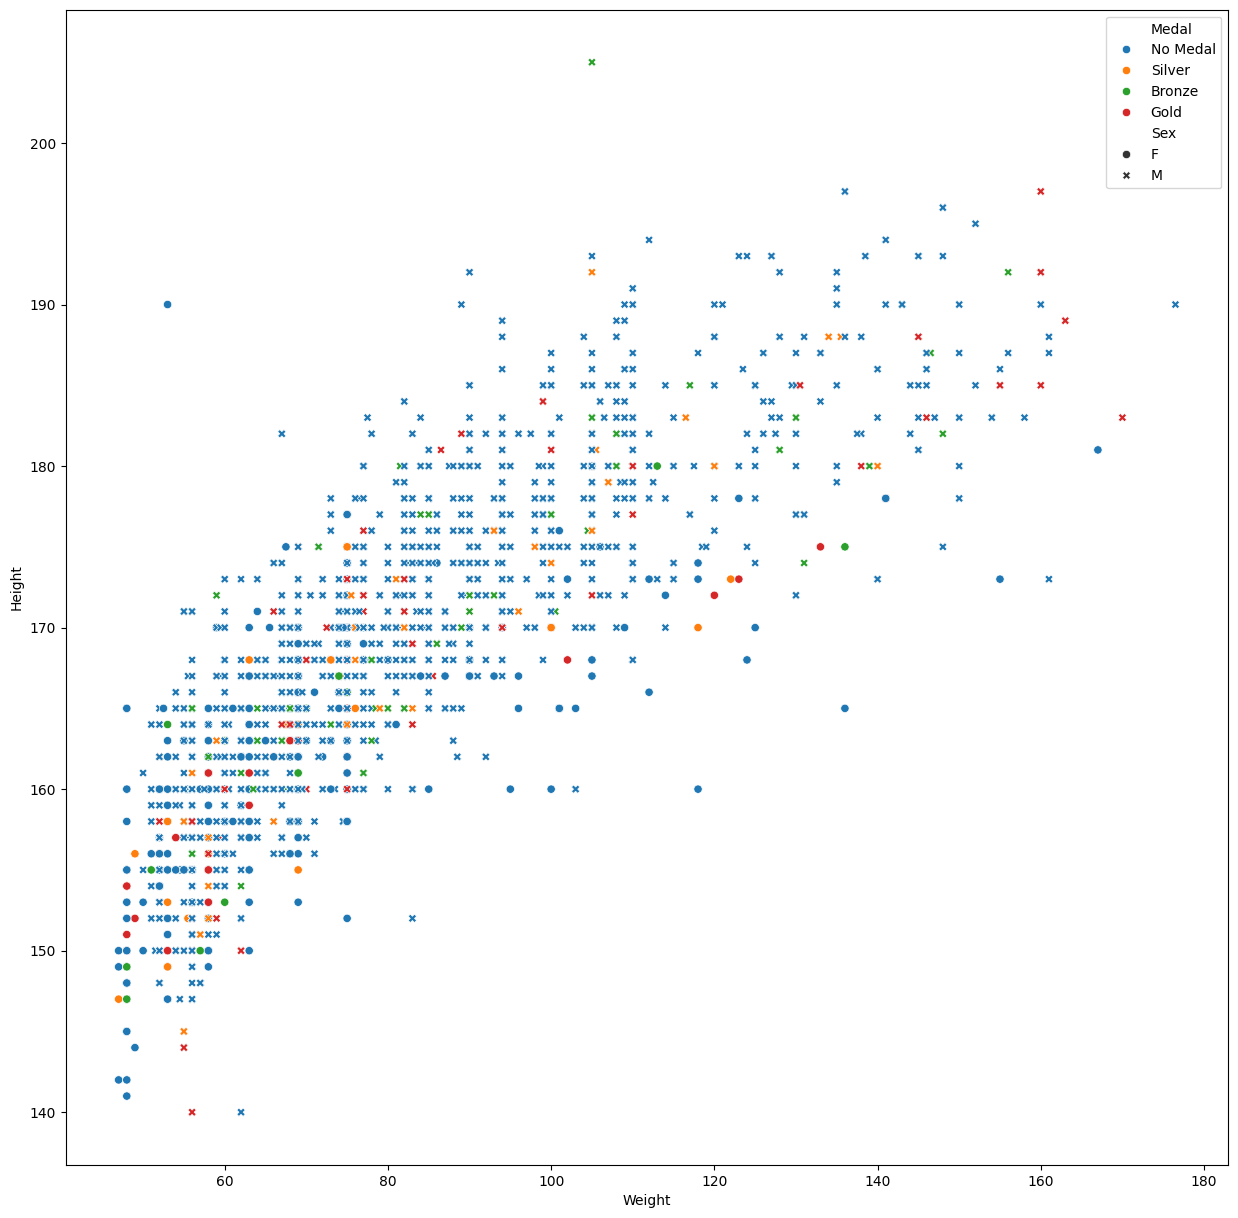

In [ ]:
plt.figure(figsize=(15,15))  # Assign a value to a variable
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(x='Weight',y='Height',hue=temp_df['Medal'],data=athlete_df,style=temp_df['Sex'])  # Assign a value to a variable

In [ ]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()  # Set index for the DataFrame
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()  # Set index for the DataFrame

In [ ]:
final = men.merge(women,on='Year')  # Merge two DataFrames
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)  # Assign a value to a variable

In [ ]:
final.fillna(0,inplace=True)  # Fill missing values

In [ ]:
fig = px.line(final,x='Year',y=['Male','Female'])  # Assign a value to a variable
fig.show()